In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/iris/Iris.csv
/kaggle/input/iris/database.sqlite


# Neural Networks Implementation on IRIS Dataset
#### This implementation is from scratch. i.e. only Numpy and matplotlib.pyplot is used to implement a neural network having 2 hidden layers
#### pandas is used to read the dataset and to apply one-hot encoding to the labels of class
#### tqdm is used to display progress bar while performing Gradient Descent Iterations

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from tqdm import tqdm

In [3]:
# Read dataset, divide it into train and test set
dataset = pd.read_csv("/kaggle/input/iris/Iris.csv")
dataset.loc[dataset["Species"] == "Iris-setosa","Species"] = 1
dataset.loc[dataset["Species"] == "Iris-versicolor","Species"] = 2
dataset.loc[dataset["Species"] == "Iris-virginica","Species"] = 3
dataset = dataset.to_numpy()
np.random.shuffle(dataset)

dataset = np.asarray(dataset,dtype = np.float64)
len_dataset = dataset.shape[0]

train = dataset[:int(0.75*len_dataset),:]
X = train[:,1:-1]
Y = train[:,-1]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()
op_neurons=len(Y[0])
N,p = X.shape

test = dataset[int(0.75*len_dataset):,:]
Xt = test[:,1:-1]
Yt = test[:,-1]
Yt = pd.get_dummies(Yt)
Yt = Yt.to_numpy()
Nt,pt = Xt.shape

In [4]:
def compute_cost(h,Y):
    N = Y.shape[0]
    logprobs = np.multiply(Y,np.log(h)) + np.multiply(1-Y,np.log(1-h))
    cost = (-1/N)*np.sum(logprobs)
    
    cost = float(np.squeeze(cost))  # return [[17]] as 17
    return cost

In [5]:
def sigmoid(x):
    return ((1)/(1+np.exp(-x)))

def sigmoid_derivative(x):
    result = np.multiply(sigmoid(x) , (1-sigmoid(x)))
    return(result)

In [6]:
def softmax(x):
    num = np.exp(x)
    den = np.sum(num,axis = 0,keepdims = True)
    return (num / den)

In [7]:
# Neural Network Model parameters initialization function, parameters to be saved in a dictionary
def parameter_init(layers):
    parameters = {}
    for i in range(1,len(layers)):
        parameters["W"+str(i)] = 0.01*np.random.randn(layers[i],layers[i-1])
        parameters["b"+str(i)] = np.zeros((layers[i],1))
    return (parameters)

In [8]:
# Structure of Neural network, saved into a list to modify easily
structure = [p,12,8,op_neurons]

# Initialize parameters
parameters = parameter_init(structure)

100%|██████████| 10000/10000 [00:04<00:00, 2175.55it/s]


Training Cost 0.10059864730818704


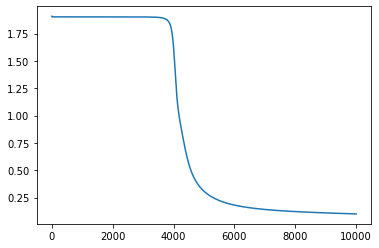

In [9]:
# dictionary
# Implementation of Network using Gradient Descent
epochs = 10000
alpha = 0.1
costs = []
for num in tqdm(range(epochs)):
    #Forward Propogation
    a1 = np.dot(parameters["W1"],X.T) + parameters["b1"]
    h1 = sigmoid(a1)
    a2 = np.dot(parameters["W2"],h1) + parameters["b2"]
    h2 = sigmoid(a2)
    a3 = np.dot(parameters["W3"],h2) + parameters["b3"]
    h3 = softmax(a3)
    # Gradients for Backpropogation
    
    dL_da3 = -( Y.T - h3)
    dL_dW3 = (1/N)*np.dot(dL_da3 , h2.T)
    dL_db3 = (1/N)*(np.sum(dL_da3,axis=1,keepdims = True))
    
    dL_dh2 = np.dot(parameters["W3"].T , dL_da3)
    dL_da2 = np.multiply(dL_dh2,sigmoid_derivative(a2))
    dL_dW2 = (1/N)*np.dot(dL_da2 , h1.T)
    dL_db2 = (1/N)*(np.sum(dL_da2,axis=1,keepdims = True))
    
    dL_dh1 = np.dot(parameters["W2"].T , dL_da2)
    dL_da1 = np.multiply(dL_dh1,sigmoid_derivative(a1))
    dL_dW1 = (1/N)*np.dot(dL_da1 , X)
    dL_db1 = (1/N)*(np.sum(dL_da1,axis = 1,keepdims = True))
    
    # GD Updates
    parameters["W3"] = parameters["W3"] - (alpha)*dL_dW3
    parameters["b3"] = parameters["b3"] - (alpha)*dL_db3
    parameters["W2"] = parameters["W2"] - (alpha)*dL_dW2
    parameters["b2"] = parameters["b2"] - (alpha)*dL_db2
    parameters["W1"] = parameters["W1"] - (alpha)*dL_dW1
    parameters["b1"] = parameters["b1"] - (alpha)*dL_db1
    costs.append(compute_cost(h3.T,Y))
plt.plot(costs)
print("Training Cost",costs[-1])

In [10]:
# Prediction
k=99
print("Y=",Y[k],"\t\ny=",h3.T[k])

Y= [1 0 0] 	
y= [9.94747145e-01 5.25285424e-03 8.35248314e-10]


In [11]:
# Prediction on test set
#Forward Propogation
a1t = np.dot(parameters["W1"],Xt.T) + parameters["b1"]
h1t = sigmoid(a1t)
a2t = np.dot(parameters["W2"],h1t) + parameters["b2"]
h2t = sigmoid(a2t)
a3t = np.dot(parameters["W3"],h2t) + parameters["b3"]
h3t = softmax(a3t)
print("Cost of test set",compute_cost(h3t.T,Yt))

Cost of test set 0.14353394079432186
